In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Setting the random seed
# Feel free to change it to see different solutions
np.random.seed(42)

def step_function(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    """
    The function should receive as inputs the data X, the labels y, the
    weights W (as an array), and the bias b, update the weights and bias
    W, b, according to the perceptron algorithm, and return W and b.
    """
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

# Testing your algorithm code

X_test = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
y_test = np.array([1,1,0,0])
W_test = np.array([[0.5], [0.5]])
b_test = 0.5

output_W, output_b = perceptron_step(
    X_test,
    y_test,
    W_test,
    b_test,
    0.01
)
solution_W = np.array([[ 0.51],[ 0.49]])
solution_b = 0.49
if np.array_equal(output_W, solution_W) and output_b == solution_b:
    print("Nice work coding the perceptron algorithm!")
else:
    print("Try again. For perceptron_step(\n{}, \n{}, \n{}, \n{}, \
\n{}\n)\nthe expected result was \nW=\n{}\nand b={}, but your output \
was \nW=\n{}\nand b={}".format(
        X_test,
        y_test,
        W_test,
        b_test,
        0.01,
        solution_W,
        solution_b,
        output_W,
        output_b
    ))

Nice work coding the perceptron algorithm!


When you are done implementing the algorithm and the cell above prints "Nice work coding the perceptron algorithm!" go ahead and run the cell below, which will repeatedly run your `perceptron_step` function and plot the solution below.

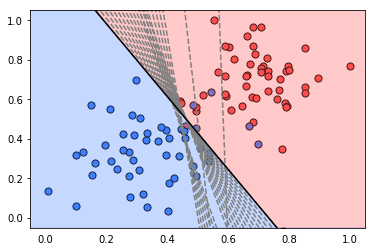

In [2]:
def train_perceptron_algorithm(X, y, learn_rate=0.01, num_epochs=25):
    """
    This function runs the perceptron algorithm repeatedly on the dataset,
    and returns a few of the boundary lines obtained in the iterations,
    for plotting purposes.
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptron_step(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

def plot_line(m, b, linestyle='dashed', color='gray', fill=False):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-10.0, 10.0, 0.1)
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
        plt.fill_between(x, m*x+b, -0.05, color=blue, alpha=0.3)
        plt.fill_between(x, m*x+b, 1.05, color=red, alpha=0.3)
        
# Load data
data = np.asarray(pd.read_csv("data.csv", header=None))
X = data[:,0:2]
y = data[:,2]

# Get list of boundary lines
# Feel free to play with the learning rate and the num_epochs, and see
# your results plotted below
boundary_lines = train_perceptron_algorithm(X, y)

# Set up plot styling
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')

# Plot data points
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# Plot boundary lines and solution regions
for line in boundary_lines:
    slope = line[0]
    b = line[1]
    plot_line(slope, b)
solution_slope = boundary_lines[-1][0]
solution_intercept = boundary_lines[-1][1]
plot_line(solution_slope, solution_intercept, 'solid', 'k', True)